In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
...,...,...,...,...
195,0.255081,-0.231497,-0.239632,38.067836
196,0.276068,-0.648411,-0.077441,12.812755
197,0.122250,-1.157383,0.765721,70.454115
198,-0.914822,-0.897140,-0.784205,-93.235783


In [3]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [19]:
# Predicted Values
y_pred = model.predict(X_test)

# 1. Linear Relationship    
#### (The feature variables should have a Linear Relationship)
---
### `->` It occurs when values of one axis increase/decrease linearly with change in the values of another axis

Text(0.5, 1.0, 'Feature 3')

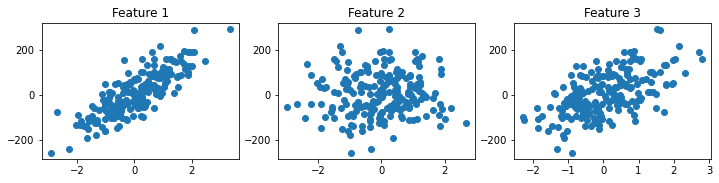

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df["feature1"], df["target"])
ax1.set_title("Feature 1")

ax2.scatter(df["feature2"], df["target"])
ax2.set_title("Feature 2")

ax3.scatter(df["feature3"], df["target"])
ax3.set_title("Feature 3")

# 2. Multicollinearity
#### (There should `NOT BE the condition of Multicollinearity` in the dataset)
#### (The features should be all independent)
#### (Any of the feature variables should not change when some other feature variable changes)
---
## Why?
### Because in Linear Regression, we see how much the Output changes based upon a feature variable assuming that the other features are constant
### Example: If 2 scientists (one from Chemistry BG and the other from Physics BG) worked upon a case study, it becomes easy to find their individual contribution rather than when they were both from identical BGs.

## How to check if Multicollinearity exists in the dataset?

### 1. Find the Variance Inflation Factor of the features
#### The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model
#### A rule of thumb for interpreting the variance inflation factor:
- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_ = []

for i in range(X_train.shape[1]):
    vif_.append(vif(X_train, i))

pd.DataFrame({"VIF": vif_}, index=df.columns[:3]).T

,feature1,feature2,feature3
VIF,1.010326,1.009871,1.01395


### 2. Find the correlation between every predictor(feature/independent column)

<AxesSubplot:>

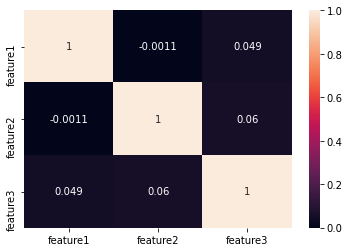

In [18]:
sns.heatmap(df.iloc[:, :3].corr(), annot=True)  # lighter areas show high correlation while darker areas show low correlation

# 3. Normal distribution of Residuals

### The residuals(difference between the actual values and the predicted values) should be distributed NORMALLY 
### The residual values should have a mean of 0 and standard deviation of 1

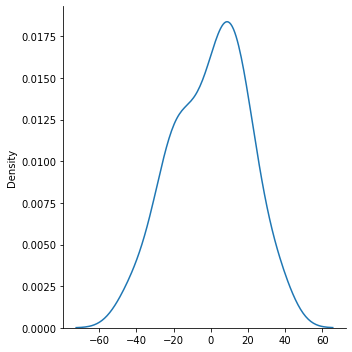

In [21]:
residuals = y_test - y_pred

# KDE Plot of residuals
sns.displot(residuals, kind='kde')

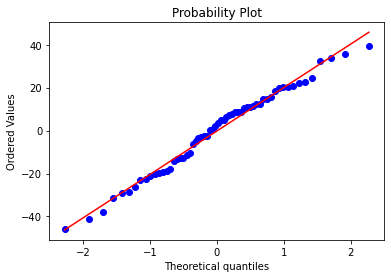

In [23]:
# QQ Plot of residuals
import scipy as sp

fig, ax = plt.subplots(figsize=(6, 4))
sp.stats.probplot(residuals, plot=ax, fit=True)

plt.show()

# 4. Homoscedasticity

## {"homo": "same", "scedasticity": "spread"} == Having the same spread
- ### The spread should be uniform and cover the whole plot
- ### Variance of the residual should be constant

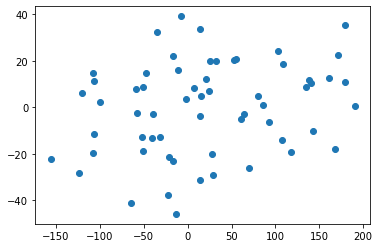

In [28]:
plt.scatter(x=y_pred, y=residuals)

# 5. No Autocorrelation of Errors (aka Residuals)
### When you plot the residuals, it should not follow a pattern

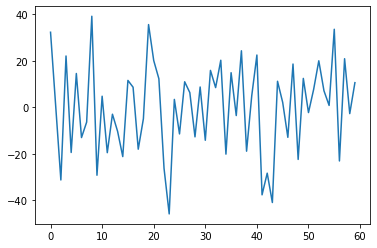

In [29]:
plt.plot(residuals)